In [6]:
'''
Load the Leaderboard data.
Each row consists of TeamId,TeamName,SubmissionDate,Score
'''
import pandas as pd
import numpy as np

df0 = pd.read_csv("data/PublicLeaderboard.csv", delimiter=",", header=0, index_col=None)
print('Shape of Leaderboard data frame: {0}'.format(df0.shape))
print('Number of teams: {0}'.format(df0["TeamId"].unique().size))

Shape of Leaderboard data frame: (19623, 4)
Number of teams: 3155


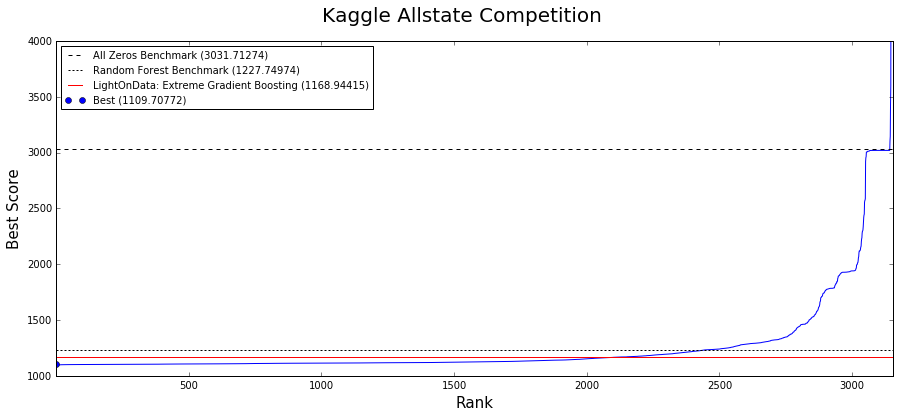

In [47]:
'''
Pick the best score per team and plot it versus team rank.
'''
import matplotlib.pyplot as plt
%matplotlib inline

BestScores = sorted(df0.groupby("TeamId")["Score"].agg(np.min).tolist(),reverse=False)
fig, axes  = plt.subplots( nrows=1, ncols=1, figsize=(15,6) )
plt.suptitle("Kaggle Allstate Competition", fontsize=20)
bins       = np.arange(1,len(BestScores)+1)
axes.plot(bins, BestScores)
axes.set_xlim(1,len(BestScores)+1)
axes.set_xlabel("Rank", fontsize=15)
axes.set_ylim([1000.0,4000.0])
axes.set_yscale("linear")
axes.set_ylabel("Best Score", fontsize=15)
axes.axhline(y=3031.71274, xmin=0.0, xmax=1.0, color='k', dashes=[4,4], label='All Zeros Benchmark (3031.71274)')
axes.axhline(y=1227.74974, xmin=0.0, xmax=1.0, color='k', dashes=[2,2], label='Random Forest Benchmark (1227.74974)')
axes.axhline(y=1168.94415, xmin=0.0, xmax=1.0, color='r', label='LightOnData: Extreme Gradient Boosting (1168.94415)')
axes.plot(1.0, 1109.70772, 'ob', label='Best (1109.70772)')
axes.legend(prop={'size': 10},loc="upper left")
plt.show()
fig.savefig('PublicLeaderboard.png', dpi=200, bbox_inches='tight')